# Análisis Exploratorio de Datos (EDA)

## Importación de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pywt

In [2]:
sns.set(style="whitegrid")

### Descripción de librerías

- **`pandas` (`import pandas as pd`)**: Una librería poderosa para la manipulación y análisis de datos tabulares. Proporciona estructuras como DataFrames y Series, útiles para gestionar datos estructurados de manera eficiente.

- **`numpy` (`import numpy as np`)**: Una librería fundamental para el cálculo numérico en Python. Ofrece soporte para matrices y operaciones matemáticas de alto rendimiento.

- **`matplotlib.pyplot` (`import matplotlib.pyplot as plt`)**: Un módulo de Matplotlib que permite crear visualizaciones gráficas 2D, como gráficos de líneas, barras, dispersión, entre otros.

- **`seaborn` (`import seaborn as sns`)**: Una librería de visualización de datos basada en Matplotlib, que facilita la creación de gráficos estadísticos más atractivos y con estilo.

- **`pywt` (`import pywt`)**: Una librería para realizar transformadas wavelet, ampliamente utilizada en el análisis de señales y datos en aplicaciones como procesamiento de imágenes y series temporales.


## Carga del Conjunto de Datos

**Acerca del set de datos:**

Los datos para usar son el conjunto de datos Emothaw, es un set de datos explícitamente diseñado al estudio de emociones usando análisis y patrones en la escritura.

Incluye muestras escritas a mano recopiladas de participantes en diferentes estados emocionales.

Estos estados emocionales a menudo se inducen mediante métodos psicológicos validados, como videos o estímulos diseñados para provocar emociones (por ejemplo, felicidad, tristeza, ira, etc.).

### **Carga de conjunto de datos**


Los datos se encuentran en formato .csv, estos datos fueron conglomerados anteriormente junto con sus propias etiquetas y guardados en un documento. parquet, el cual usamos para cargar la información de manera mas sencilla.

El proceso de conglomerado de datos raw a un .parquet sucede en el notebook [notebooks/DataPreparation.ipynb](https://github.com/PosgradoMNA/Proyecto_Integrador_Equipo_11/blob/main/notebooks/DataPreparation.ipynb)


In [4]:
file_path = '../data/raw_binary/labeled_data_timeseries.parquet'
df = pd.read_parquet(file_path)

In [5]:
df.head()

,homework,pen_status,x,y,timestamp,azimuth,altitude,pressure,depression,anxiety,stress
Subject,,,,,,,,,,,
1,1,0,"[48331, 48318, 48305, 48305, 48305, 48305, 483...","[31876, 31963, 32053, 32159, 32159, 32159, 321...","[672620, 672628, 672635, 672643, 672650, 67282...","[1830, 1830, 1830, 1830, 1830, 1830, 1830, 234...","[530, 530, 530, 530, 530, 530, 530, 350, 360, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",False,True,False
1,1,1,"[47944, 47949, 47949, 47950, 47950, 47950, 479...","[33492, 33506, 33512, 33515, 33519, 33524, 335...","[671854, 671861, 671869, 671876, 671884, 67189...","[1800, 1800, 1800, 1800, 1800, 1810, 1810, 181...","[490, 500, 500, 500, 500, 500, 500, 500, 500, ...","[67, 148, 193, 228, 270, 306, 341, 365, 381, 3...",False,True,False
1,2,0,"[41647, 41714, 41787, 41896, 41896, 41616, 416...","[14655, 14657, 14675, 14677, 14677, 15475, 154...","[692915, 692922, 692930, 692937, 692945, 69356...","[1830, 1830, 1830, 1840, 1840, 2530, 2530, 253...","[530, 530, 530, 530, 530, 450, 450, 450, 460, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",False,True,False
1,2,1,"[45074, 45128, 45144, 45158, 45164, 45169, 451...","[14676, 14676, 14679, 14689, 14696, 14701, 147...","[692434, 692441, 692449, 692456, 692464, 69247...","[1930, 1940, 1940, 1940, 1940, 1940, 1940, 194...","[510, 510, 510, 510, 510, 510, 510, 510, 510, ...","[50, 207, 282, 304, 377, 418, 426, 438, 447, 4...",False,True,False
1,3,0,"[33431, 33563, 33626, 33685, 33747, 33812, 338...","[35956, 35956, 35959, 35976, 35991, 36002, 360...","[724897, 724905, 724912, 724920, 724927, 72493...","[1760, 1760, 1760, 1760, 1760, 1760, 1770, 177...","[620, 610, 610, 610, 610, 610, 600, 600, 600, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",False,True,False


Como se puede observar, el dataframe continene las siguientes columnas:

*   **Subject** el cual identifica al usuario al que se le hicieron las pruebas.

*   **Homework** representa el tipo de dibujo realizado por el usuario. Se tienen 8 tipos de tareas: 
    
    0. Clasificado erróneamente
    1. Pentágonos
    2. Casa
    3. Palabras copiadas a mano
    4. Círculos concéntricos dibujados con mano izquierda
    5. Círculos concéntricos dibujados con mano derecha
    6. Reloj
    7. Texto copiado en cursivas

*   **pen_status** este nos muestra si la pluma se encuentra arriba (0) o abajo (1).

*   **X y Y** son series de tiempo que representan las coordenadas de los trazos en x y y.

*   **Azimuth**  son series de tiempo que representan el ángulo entre la orientación del lápiz y una dirección de referencia en el plano de la superficie de la tableta.

*   **Altitude** es una serie de tiempo que contiene ángulo entre el lápiz y la superficie de la tableta.

*   **Pressure** Presión al escribir en la pluma.

*   Nuestras etiquetas serian los valores booleanos designados a las emociones como **depresión, ansiedad y estrés**. De acuerdo con el trabajo desarrollado por (TODO: agregar referencia paper nolazco) se consideraron las etiquetas de acuerdo con lo siguiente:

Label | Depression | Anxiety | Stress
---:|:---:| --- | ---
**Normal (0)** | 0-9 | 0-7 | 0-14
**Above Normal (1)** | 10-28+ | 8-20+ | 15-34+

En este notebook ya se cuentan con las etiquetas en forma booleana, para ver los valores raw se puede consultar el notebook [notebooks/DataPreparation.ipynb](https://github.com/PosgradoMNA/Proyecto_Integrador_Equipo_11/blob/main/notebooks/DataPreparation.ipynb)

## Estructura de los Datos

### Forma del conjunto de datos

In [6]:
print("Forma del conjunto de datos:", df.shape)

Forma del conjunto de datos: (1588, 11)


Podemos observar que nuestros datos actuales tienen la dimensión de (1588, 11), en otras palabras: 1588 ejemplos.

### Tipos de datos y conteo de valores no nulos

In [7]:
print("\nTipos de datos y conteo de valores no nulos:")
df.info()


Tipos de datos y conteo de valores no nulos:
<class 'pandas.core.frame.DataFrame'>
Index: 1588 entries, 1 to 129
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   homework    1588 non-null   int64 
 1   pen_status  1588 non-null   int64 
 2   x           1588 non-null   object
 3   y           1588 non-null   object
 4   timestamp   1588 non-null   object
 5   azimuth     1588 non-null   object
 6   altitude    1588 non-null   object
 7   pressure    1588 non-null   object
 8   depression  1588 non-null   bool  
 9   anxiety     1588 non-null   bool  
 10  stress      1588 non-null   bool  
dtypes: bool(3), int64(2), object(6)
memory usage: 116.3+ KB


En este caso el tipo de dato no indica si la información es categórica o numérica.

Variables categóricas (5):
- homework
- pen_status
- depression (label)
- anxiety (label)
- stress (label)

Variables numéricas (5):
- x
- y
- azimuth
- altitude
- pressure

En este caso las variables numéricas ya se encuentran en formato de series de tiempo no como valores individuales.

Se considera anular la variable de timestamp dado que las señales ya están ordenadas de manera cronológica en el tiempo y no aporta información adicional para los métodos de clasificación que serán utilizados.


In [8]:
categorical_columns = ['homework', 'pen_status', 'depression', 'anxiety', 'stress']
numerical_columns = ['x', 'y', 'azimuth', 'altitude', 'pressure']

Podemos adicionalmente determinar el tipo de las variables en las series de tiempo

In [9]:
for numerical_col in numerical_columns:
    print(f"Tipo de datos para {numerical_col}: {type(df[numerical_col].iloc[0][0])}")

Tipo de datos para x: <class 'numpy.int64'>
Tipo de datos para y: <class 'numpy.int64'>
Tipo de datos para azimuth: <class 'numpy.int64'>
Tipo de datos para altitude: <class 'numpy.int64'>
Tipo de datos para pressure: <class 'numpy.int64'>


Podemos observar que todos los datos de serie de tiempo son enteros.

### Resumen estadístico para columnas numéricas

Para el análisis estadístico descriptivo de las variables numéricas se utilizará el dataframe que contiene un sample por fila. 

In [23]:
file_path = '../data/raw_binary/labeled_data.parquet'
df_raw = pd.read_parquet(file_path)

In [24]:
print("\nEstadísticas descriptivas para columnas numéricas:")
df_raw[numerical_columns].describe()


Estadísticas descriptivas para columnas numéricas:


,x,y,azimuth,altitude,pressure
count,2.680608e+06,2.680608e+06,2.680608e+06,2.680608e+06,2.680608e+06
mean,3.204618e+04,1.988526e+04,1.915995e+03,5.893773e+02,2.983005e+02
std,1.359955e+04,1.007838e+04,5.267162e+02,7.944353e+01,3.006754e+02
min,2.215000e+03,1.000000e+01,0.000000e+00,2.200000e+02,0.000000e+00
25%,2.138500e+04,1.169200e+04,1.750000e+03,5.400000e+02,0.000000e+00
50%,3.353400e+04,1.498200e+04,1.890000e+03,5.800000e+02,2.690000e+02
75%,4.572400e+04,3.054200e+04,2.060000e+03,6.300000e+02,5.480000e+02
max,6.150400e+04,4.063000e+04,3.590000e+03,9.000000e+02,1.023000e+03


TODO: describir los datos

### Frecuencia de valores únicos para columnas categóricas

In [25]:
for column in categorical_columns: 
    print("Para {} se tienen {} valores únicos".format(column, df[column].nunique()))
    print("Que son los siguientes: \n{}\n".format(df[column].value_counts()))

Para homework se tienen 8 valores únicos
Que son los siguientes: 
homework
1    258
2    258
3    258
6    258
7    258
4    157
5    135
0      6
Name: count, dtype: int64

Para pen_status se tienen 2 valores únicos
Que son los siguientes: 
pen_status
1    906
0    682
Name: count, dtype: int64

Para depression se tienen 2 valores únicos
Que son los siguientes: 
depression
False    1165
True      423
Name: count, dtype: int64

Para anxiety se tienen 2 valores únicos
Que son los siguientes: 
anxiety
False    907
True     681
Name: count, dtype: int64

Para stress se tienen 2 valores únicos
Que son los siguientes: 
stress
False    904
True     684
Name: count, dtype: int64



### Verificación de valores nulos

In [26]:
print("\nValores faltantes en el conjunto de datos:")
df_raw.isnull().sum()


Valores faltantes en el conjunto de datos:


x             0
y             0
timestamp     0
pen_status    0
azimuth       0
altitude      0
pressure      0
homework      0
Subject       0
depression    0
anxiety       0
stress        0
dtype: int64

Por la naturaleza del set de datos, al ser datos recolectados por expertos que requerían realizar ejercicios manuales y repetirse en caso de que no se completar el ejercicio, nuestro set de datos no tiene ningún valor nulo.

Esto significa que no es necesario implementar algún método o algoritmo que nos ayude a llenar los datos nulos.

Sin embargo observamos que existen 6 casos de tareas que no están clasificadas dentro de una categoría dada. Por el momento no se eliminarán ya que representan el 0.37% de los datos. Al ser mínimo determinaremos si causan un impacto al modelo de clasificación más adelante.

In [27]:
float(df['homework'].value_counts()[0]/df['homework'].shape[0]*100)

0.3778337531486146

## Análisis de Univariante

### Visualizaciones para Datos Numéricos

In [28]:
def make_countplot(df, column_names, bins=10, fig_size=(10,20)):
  plt.figure(figsize=fig_size, constrained_layout=True)
  for idx,column_name in enumerate(column_names):
    ax = plt.subplot(len(column_names)//2+1, 3,idx+1)
    sns.countplot(df, x=column_name)
    ax.set_title(column_name)
  plt.show()

def make_hist_plot(df, column_names, bins=10, fig_size=(10,20)):
  plt.figure(figsize=fig_size, constrained_layout=True)
  for idx,column_name in enumerate(column_names):
    ax = plt.subplot(len(column_names)//2+1, 3,idx+1)
    df[column_name].hist(bins=bins)
    ax.set_title(column_name)
  plt.show()

#### Histogramas

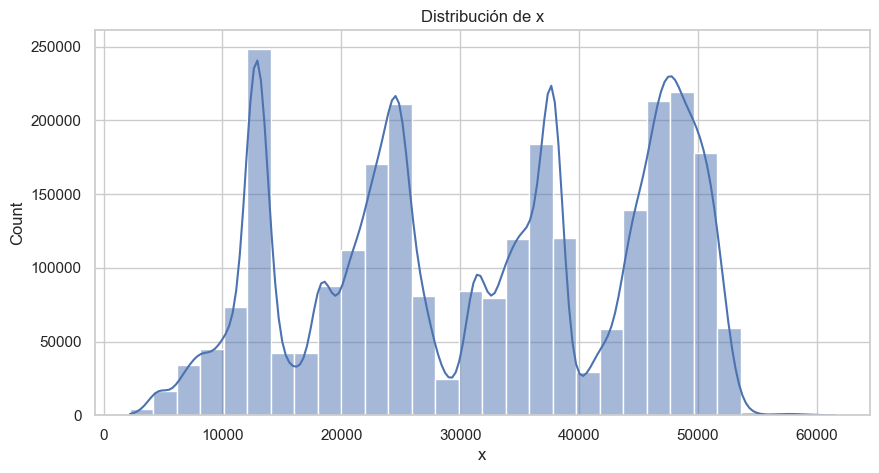

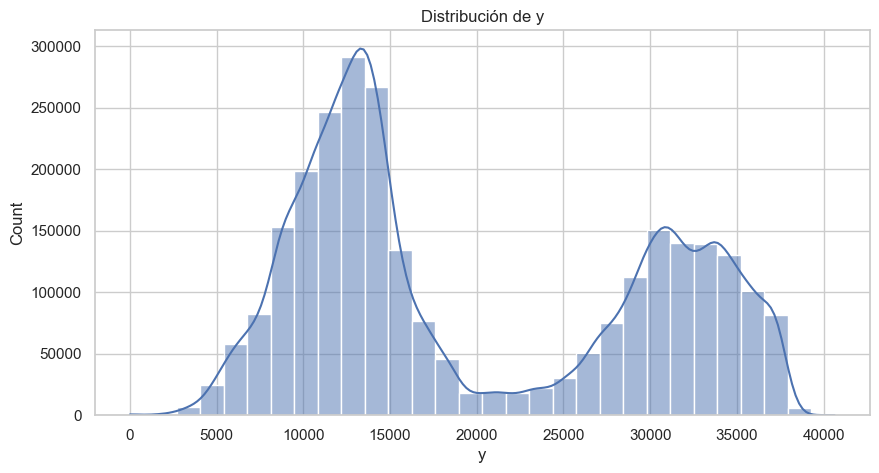

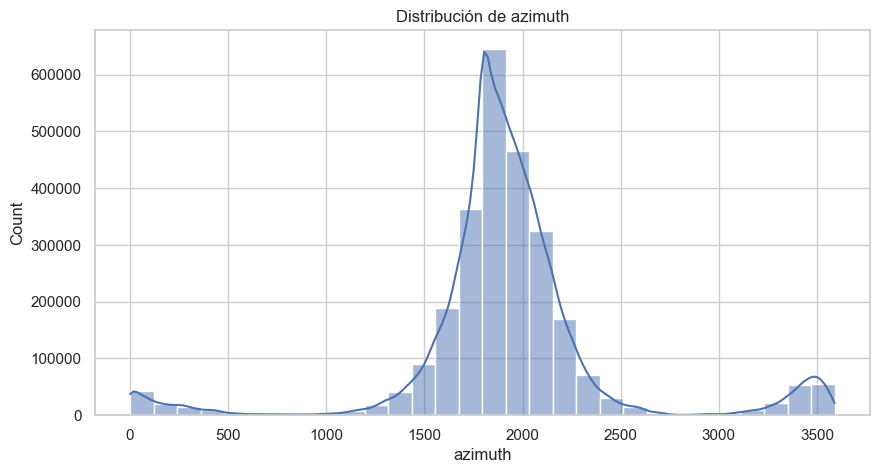

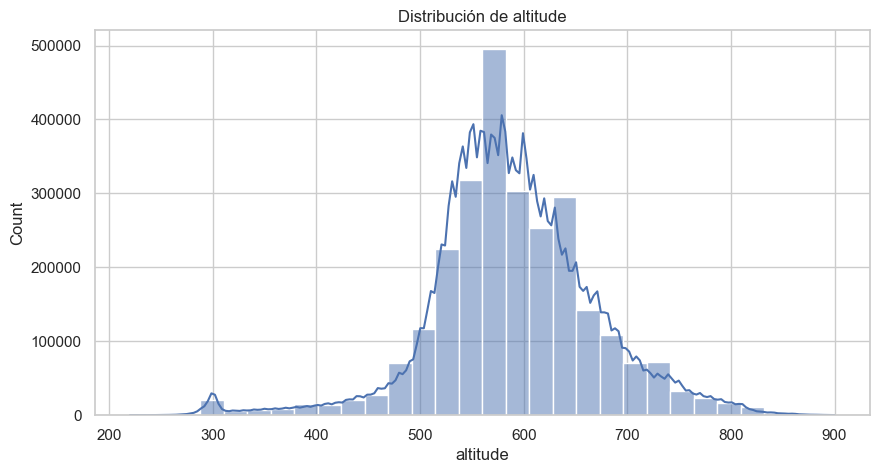

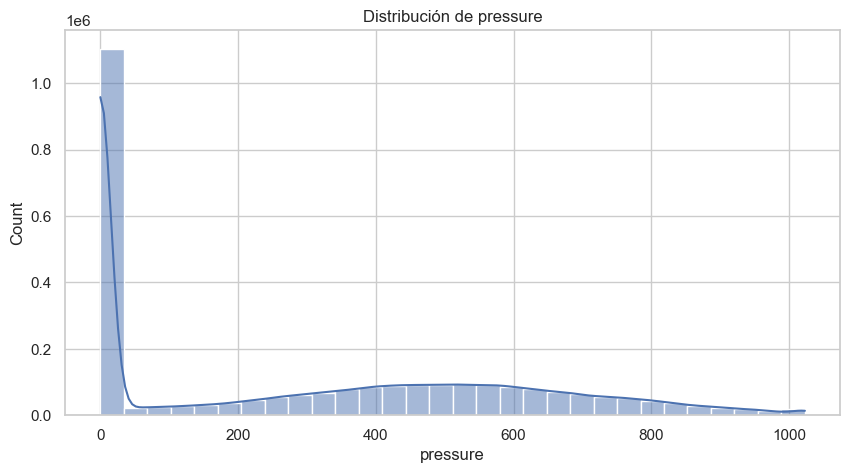

In [29]:
for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df_raw[col], kde=True, bins=30)
    plt.title(f"Distribución de {col}")
    plt.show()

TODO: hacer analisis, clasificar tipo de curtosis, tipo de sesgo. Explicar por qué no se haran transformaciones normales porque son series de tiempo.


#### Diagramas de Caja

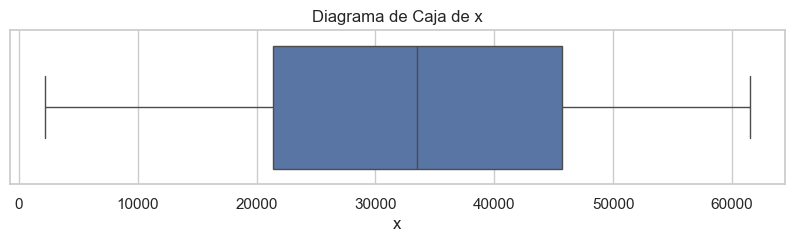

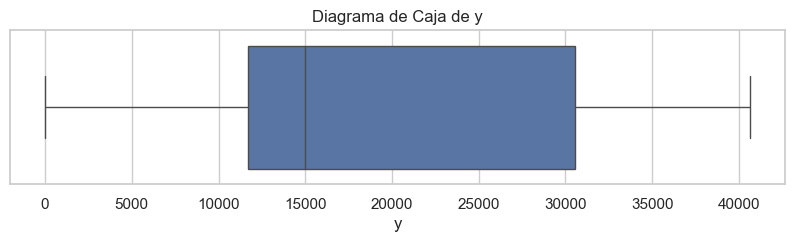

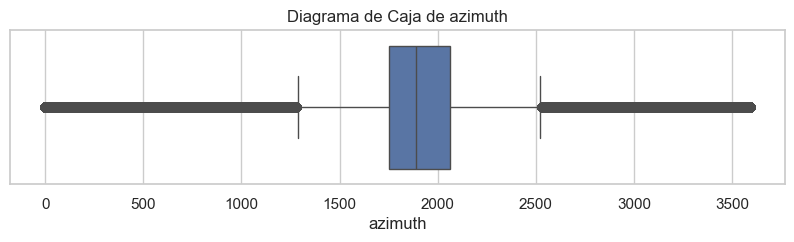

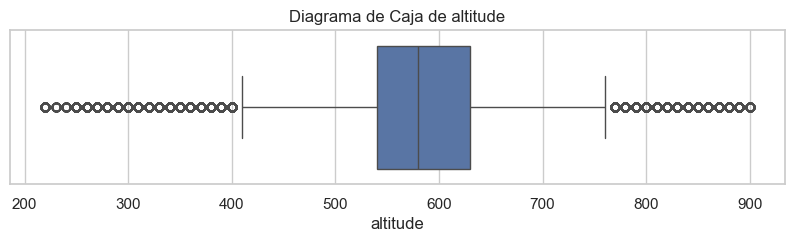

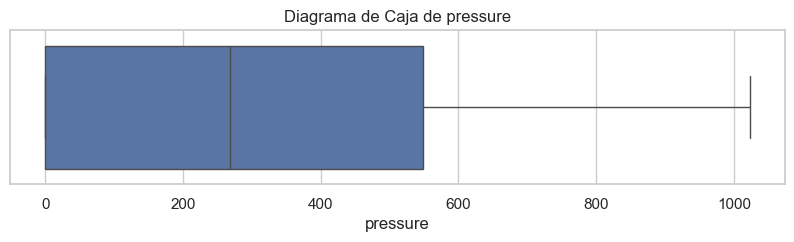

In [30]:
for col in numerical_columns:
    plt.figure(figsize=(10, 2))
    sns.boxplot(x=df_raw[col])
    plt.title(f"Diagrama de Caja de {col}")
    plt.show()

TODO: analisis de outliers en boxplot

Dado que estamos trabajando con series de tiempo y que los datos se procesarán de esta forma, es más util observar la distribución temporal de los datos así como el equivalente a lo que sería un diagrama de caja de forma temporal. Esto nos indica valores máximos, mínimos, quartiles y media para cada sample tiempo.

TODO: Agregar la gráfica de series de tiempo con quantiles como la de conti y analizarla

### Visualizaciones para Datos Categóricos

#### **Gráfico de conteo**

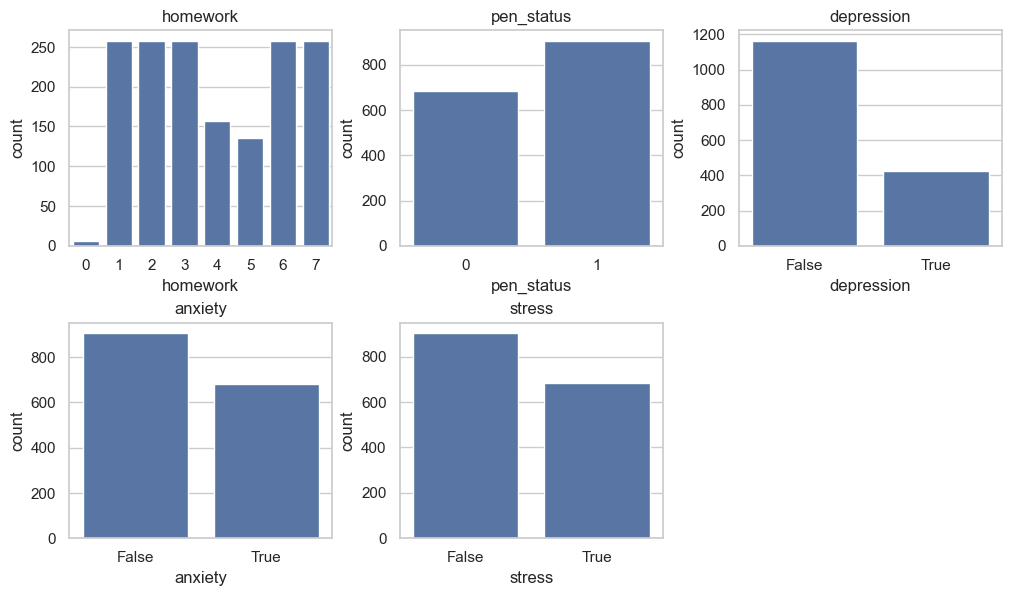

In [31]:
make_countplot(df, categorical_columns, fig_size=(10,8))

In [32]:
for column in categorical_columns: 
    print("Para {} se tienen {} valores únicos".format(column, df[column].nunique()))
    print("Que son los siguientes: \n{}\n".format(df[column].value_counts()))

Para homework se tienen 8 valores únicos
Que son los siguientes: 
homework
1    258
2    258
3    258
6    258
7    258
4    157
5    135
0      6
Name: count, dtype: int64

Para pen_status se tienen 2 valores únicos
Que son los siguientes: 
pen_status
1    906
0    682
Name: count, dtype: int64

Para depression se tienen 2 valores únicos
Que son los siguientes: 
depression
False    1165
True      423
Name: count, dtype: int64

Para anxiety se tienen 2 valores únicos
Que son los siguientes: 
anxiety
False    907
True     681
Name: count, dtype: int64

Para stress se tienen 2 valores únicos
Que son los siguientes: 
stress
False    904
True     684
Name: count, dtype: int64



TODO: Describe the countplots

## Análisis Bivariado y Multivariado

### Análisis de Correlación para Variables Numéricas

#### Matriz de Correlación

Para incluir en la matriz de correlación las variables categóricas haremos one-hot encoding de las etiquetas.

In [34]:
df_raw['depression'] = df_raw['depression'].astype(int)
df_raw['anxiety'] = df_raw['anxiety'].astype(int)
df_raw['stress'] = df_raw['stress'].astype(int)

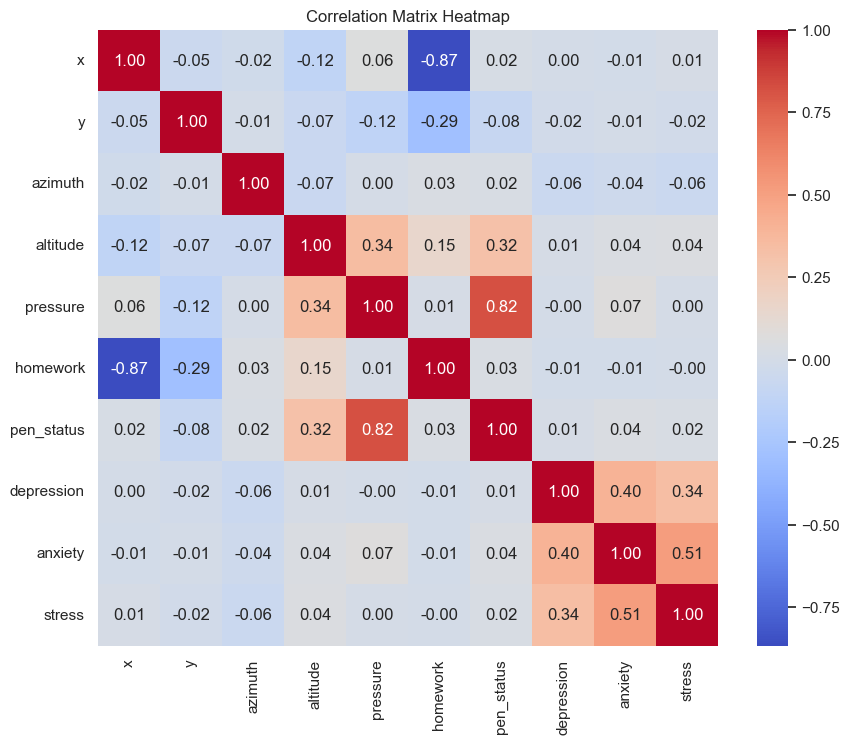

In [39]:
# Compute correlation coefficient
correlation = df_raw[numerical_columns + categorical_columns].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


TODO: agregar analisis de correlacion

#### Pairplots

No es recomendable utilizar sns.pairplot para analizar series de tiempo, ya que está diseñado para visualizar relaciones entre variables estáticas (no dependientes del tiempo). Las series de tiempo tienen una estructura secuencial donde el orden de los datos es crucial, y un pairplot no captura esta dependencia temporal.

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

for column in numerical_columns:
    plot_acf(df_raw[column], lags=50)
    plt.title(f"Autocorrelation plot for {column}")
    plt.show()

## Análisis de Series de Tiempo

### Expansión de Columnas con listas del Dataframe

In [16]:
# Expandir columnas con listas en filas separadas
df_expanded = df.explode(['x', 'y', 'timestamp', 'azimuth', 'altitude', 'pressure']).reset_index()

# Convertir columnas expandidas a numéricas
for col in ['x', 'y', 'timestamp', 'azimuth', 'altitude', 'pressure']:
    df_expanded[col] = pd.to_numeric(df_expanded[col])

# Mostrar las primeras filas del conjunto de datos expandido
df_expanded.head()

,Subject,homework,pen_status,x,y,timestamp,azimuth,altitude,pressure,depression,anxiety,stress
0,1,1,0,48331,31876,672620,1830,530,0,2,8,13
1,1,1,0,48318,31963,672628,1830,530,0,2,8,13
2,1,1,0,48305,32053,672635,1830,530,0,2,8,13
3,1,1,0,48305,32159,672643,1830,530,0,2,8,13
4,1,1,0,48305,32159,672650,1830,530,0,2,8,13


In [17]:
def plot_subject_data(subject_id, pen_status, homework_id):
    """
    Función para graficar datos de dispersión para un sujeto específico,
    con un estado de lápiz y una tarea específicos.

    Parámetros:
    subject_id (int): ID del sujeto.
    pen_status (int): Estado del lápiz (activo/inactivo).
    homework_id (int): ID de la tarea.
    """
    # Filtrar los datos
    sample_subject_data = df_expanded[(df_expanded['Subject'] == subject_id) &
                                      (df_expanded['pen_status'] == pen_status) &
                                      (df_expanded['homework'] == homework_id)]

    # Verificar si los datos filtrados no están vacíos
    if not sample_subject_data.empty:
        # Crear el gráfico de dispersión
        plt.figure(figsize=(5, 5))
        plt.scatter(-sample_subject_data['y'], sample_subject_data['x'], s=3, c='blue', alpha=0.6)
        plt.title(f"Gráfico de Dispersión: Sujeto {subject_id}, Estado del Lápiz {pen_status}, Tarea {homework_id}")
        plt.xlabel("Posición -y")
        plt.ylabel("Posición x")
        plt.grid(True)
        plt.show()
    else:
        print(f"No se encontraron datos para Sujeto {subject_id}, Estado del Lápiz {pen_status}, Tarea {homework_id}.")

In [18]:
def plot_series_data(subject_id, homework_id, pen_status):
    """
    Graficar las series temporales de las posiciones x e y para un sujeto específico.

    Parámetros:
    subject_id (int): ID del sujeto.
    homework_id (int): ID de la tarea.
    pen_status (int): Estado del lápiz (activo/inactivo).
    """
    # Filtrar los datos del sujeto
    subject_data = df_expanded[(df_expanded['Subject'] == subject_id) &
                               (df_expanded['homework'] == homework_id) &
                               (df_expanded['pen_status'] == pen_status)]

    if not subject_data.empty:
        # Graficar las posiciones x
        plt.figure(figsize=(12, 6))
        plt.plot(subject_data['timestamp'], subject_data['x'], label="x", color="blue")
        plt.title(f"Serie Temporal de x: Sujeto {subject_id}, Tarea {homework_id}, Estado del Lápiz {pen_status}")
        plt.xlabel("Timestamp")
        plt.ylabel("Posición x")
        plt.grid()
        plt.show()

        # Graficar las posiciones y
        plt.figure(figsize=(12, 6))
        plt.plot(subject_data['timestamp'], subject_data['y'], label="y", color="orange")
        plt.title(f"Serie Temporal de y: Sujeto {subject_id}, Tarea {homework_id}, Estado del Lápiz {pen_status}")
        plt.xlabel("Timestamp")
        plt.ylabel("Posición y")
        plt.grid()
        plt.show()
    else:
        print(f"No se encontraron datos para Sujeto {subject_id}, Tarea {homework_id}, Estado del Lápiz {pen_status}.")

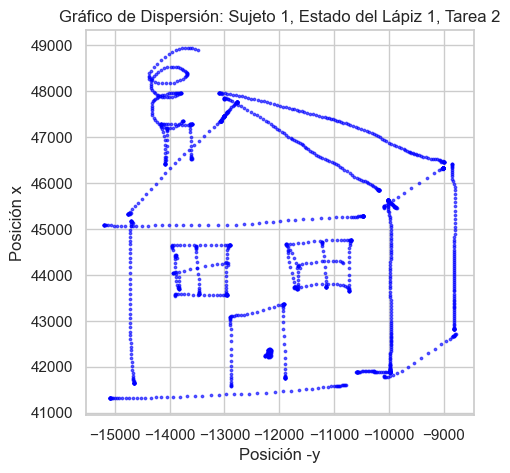

In [19]:
plot_subject_data(subject_id=1, pen_status=1, homework_id=2)

En esta grafica de dispersión, podemos ver la tarea: 2, del sujeto/paciente: 1, la pluma se encuentra abajo.

In [1]:
plot_subject_data(subject_id=1, homework_id=1, pen_status=1)

NameError: name 'plot_series_data' is not defined

De lo contrario podemos ver cuando la pluma se encuentra arriba.

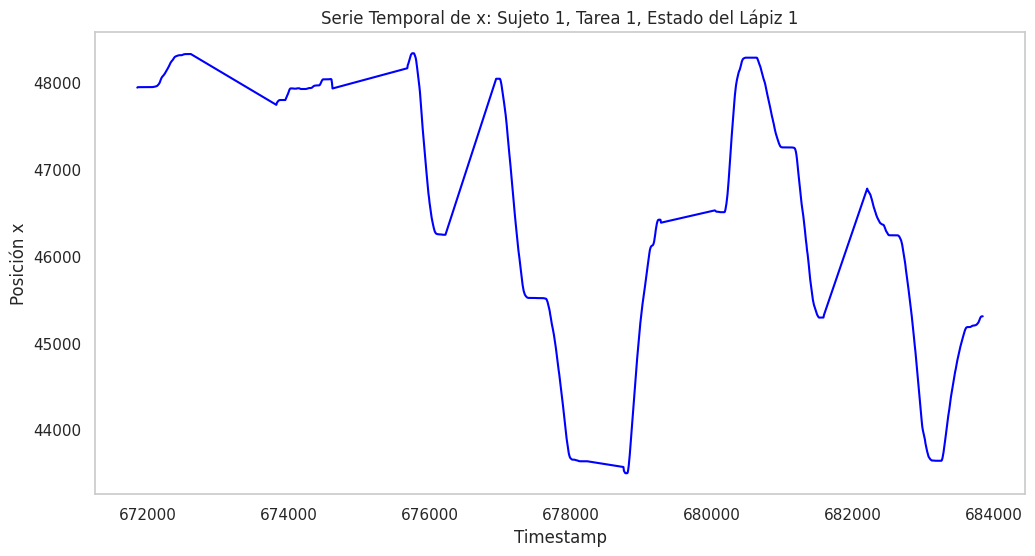

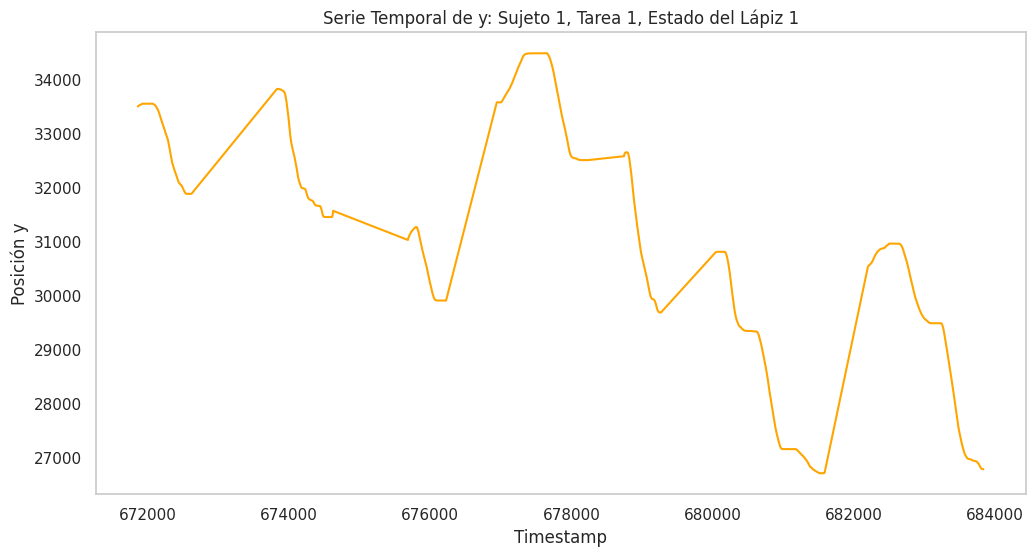

In [ ]:
plot_series_data(subject_id=1, homework_id=1, pen_status=1)

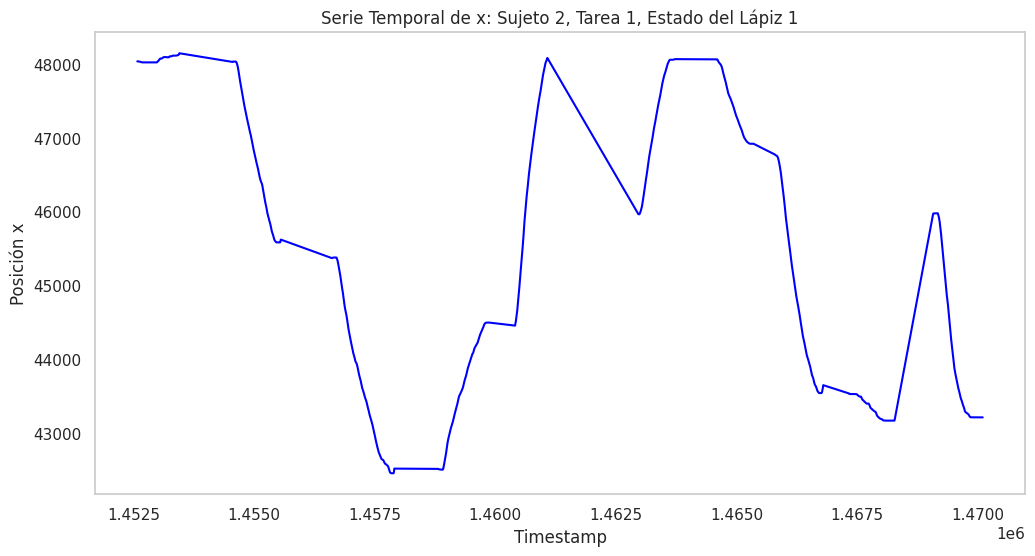

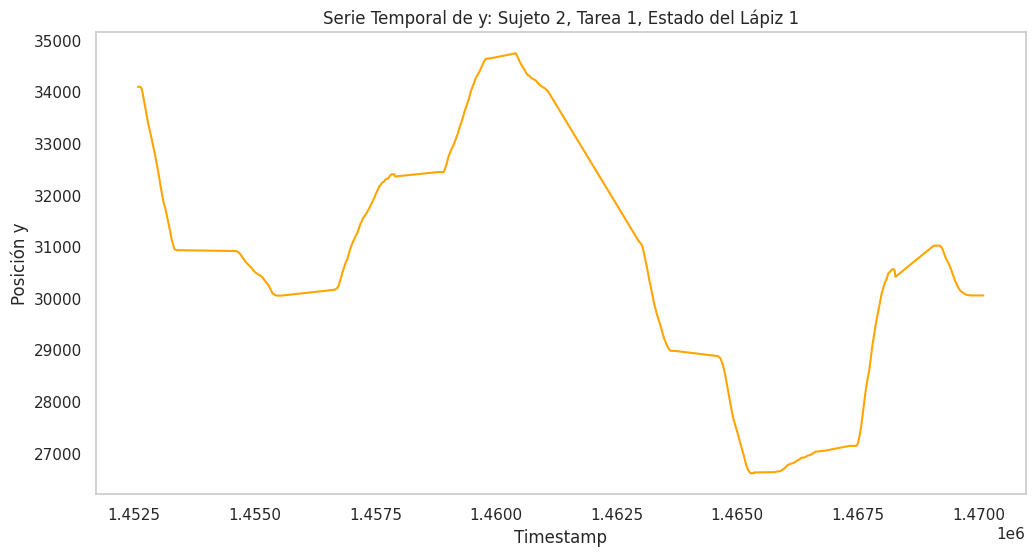

In [ ]:
plot_series_data(subject_id=2, homework_id=1, pen_status=1)

### Visualización de Datos de Series Temporales

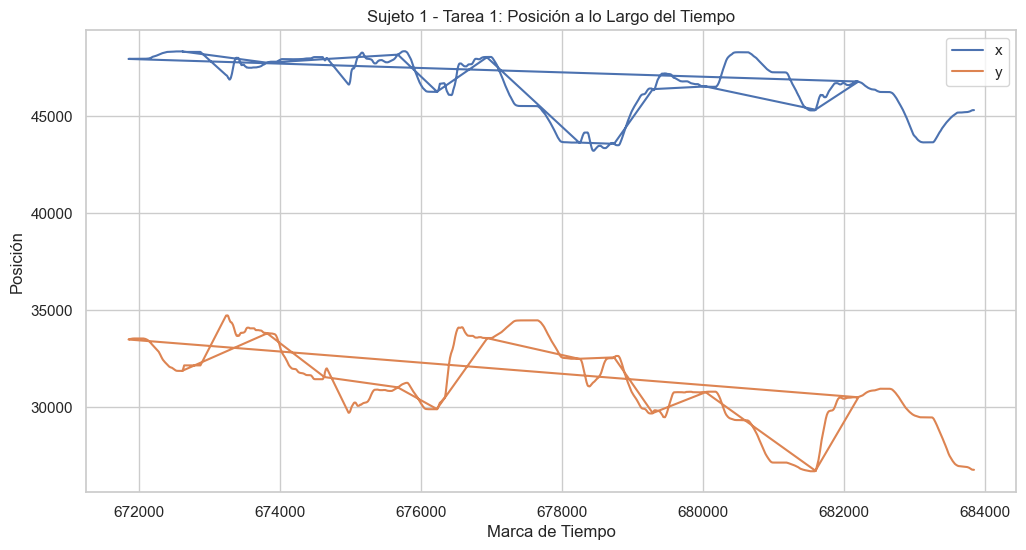

In [21]:
# Graficar series para un sujeto y tarea específicos
subject_id = 1
homework_id = 1

subject_data = df_expanded[(df_expanded['Subject'] == subject_id) & 
                           (df_expanded['homework'] == homework_id)]

# Graficar posiciones x e y a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(subject_data['timestamp'], subject_data['x'], label='x')
plt.plot(subject_data['timestamp'], subject_data['y'], label='y')
plt.title(f"Sujeto {subject_id} - Tarea {homework_id}: Posición a lo Largo del Tiempo")
plt.xlabel("Marca de Tiempo")
plt.ylabel("Posición")
plt.legend()
plt.show()

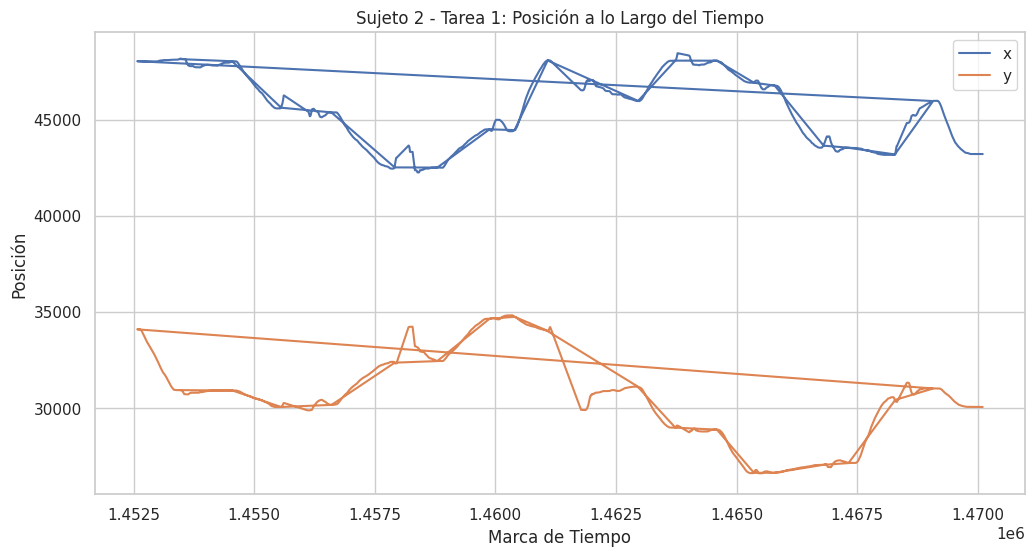

In [ ]:
# Graficar series para un sujeto y tarea específicos
subject_id = 2
homework_id = 1

subject_data = df_expanded[(df_expanded['Subject'] == subject_id) &
                           (df_expanded['homework'] == homework_id)]

# Graficar posiciones x e y a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(subject_data['timestamp'], subject_data['x'], label='x')
plt.plot(subject_data['timestamp'], subject_data['y'], label='y')
plt.title(f"Sujeto {subject_id} - Tarea {homework_id}: Posición a lo Largo del Tiempo")
plt.xlabel("Marca de Tiempo")
plt.ylabel("Posición")
plt.legend()
plt.show()

Aquí tenemos visualización de la serie de tiempo del paciente/sujeto: 1, la tarea: 1 y el lápiz abajo, lo cual significa que el sujeto estuvo tocando la tableta donde se obtuvieron los datos, con esto podemos crear una grafica con los puntos x y y, estas posiciones se pueden observar a lo largo del tiempo.

De igual manera cuando comparamos las graficas con el segundo sujeto haciendo las mismas actividades podemos observar un patrón algo similar, esto tiene sentido ya que están realizando la misma actividad, si comparamos a 2 personas haciendo la misma actividad estarán haciendo algo similar para llegar al mismo objetivo aunque lo hagan de una manera distinta con tiempos distintos.

## Preprocesamiento de los datos

### Manejo de Valores Faltantes

No hay datos faltantes en el conjunto de datos.

Nuevamente, como se había mencionado, no hay necesidad de realizar alguna técnica o algoritmo para datos faltantes en nuestro set de datos.

### Manejo de Valores Atípicos

In [22]:
# Crear una copia del dataframe original para el preprocesamiento
df_processed = df.copy()

# Detectar y manejar valores atípicos usando el método IQR
for col in numeric_cols:
    Q1 = df_processed[col].quantile(0.25)
    Q3 = df_processed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Limitar valores atípicos
    df_processed[col] = np.where(df_processed[col] < lower_bound, lower_bound, df_processed[col])
    df_processed[col] = np.where(df_processed[col] > upper_bound, upper_bound, df_processed[col])

# Mostrar las primeras filas del dataframe procesado
df_processed.head()

,homework,pen_status,x,y,timestamp,azimuth,altitude,pressure,depression,anxiety,stress
Subject,,,,,,,,,,,
1,1.0,0.0,"[48331, 48318, 48305, 48305, 48305, 48305, 483...","[31876, 31963, 32053, 32159, 32159, 32159, 321...","[672620, 672628, 672635, 672643, 672650, 67282...","[1830, 1830, 1830, 1830, 1830, 1830, 1830, 234...","[530, 530, 530, 530, 530, 530, 530, 350, 360, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.0,8.0,13.0
1,1.0,1.0,"[47944, 47949, 47949, 47950, 47950, 47950, 479...","[33492, 33506, 33512, 33515, 33519, 33524, 335...","[671854, 671861, 671869, 671876, 671884, 67189...","[1800, 1800, 1800, 1800, 1800, 1810, 1810, 181...","[490, 500, 500, 500, 500, 500, 500, 500, 500, ...","[67, 148, 193, 228, 270, 306, 341, 365, 381, 3...",2.0,8.0,13.0
1,2.0,0.0,"[41647, 41714, 41787, 41896, 41896, 41616, 416...","[14655, 14657, 14675, 14677, 14677, 15475, 154...","[692915, 692922, 692930, 692937, 692945, 69356...","[1830, 1830, 1830, 1840, 1840, 2530, 2530, 253...","[530, 530, 530, 530, 530, 450, 450, 450, 460, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.0,8.0,13.0
1,2.0,1.0,"[45074, 45128, 45144, 45158, 45164, 45169, 451...","[14676, 14676, 14679, 14689, 14696, 14701, 147...","[692434, 692441, 692449, 692456, 692464, 69247...","[1930, 1940, 1940, 1940, 1940, 1940, 1940, 194...","[510, 510, 510, 510, 510, 510, 510, 510, 510, ...","[50, 207, 282, 304, 377, 418, 426, 438, 447, 4...",2.0,8.0,13.0
1,3.0,0.0,"[33431, 33563, 33626, 33685, 33747, 33812, 338...","[35956, 35956, 35959, 35976, 35991, 36002, 360...","[724897, 724905, 724912, 724920, 724927, 72493...","[1760, 1760, 1760, 1760, 1760, 1760, 1770, 177...","[620, 610, 610, 610, 610, 610, 600, 600, 600, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.0,8.0,13.0


En esta sección se está aplicando un preprocesamiento usando el método IQR, os límites inferior y superior para posibles valores atípicos en las columnas numéricas.

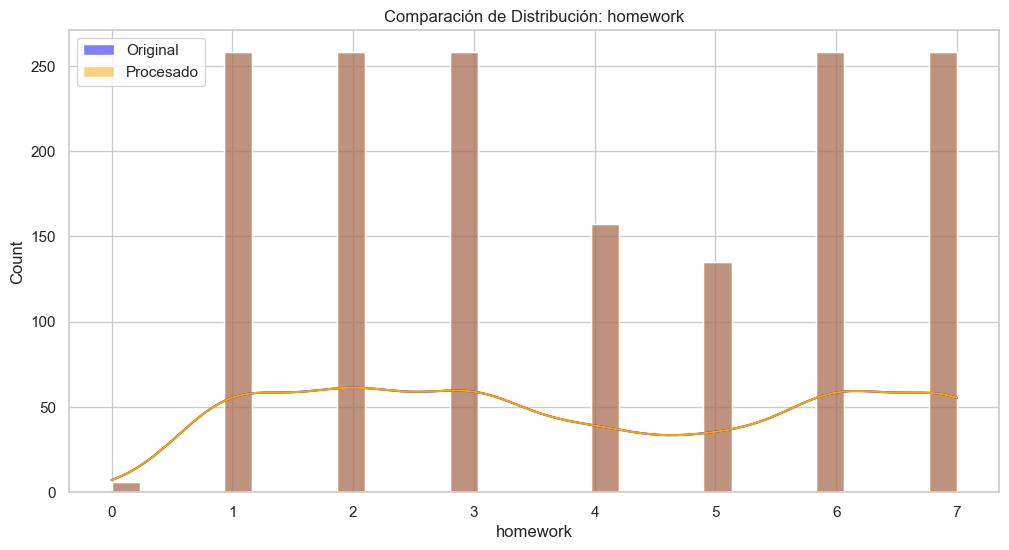

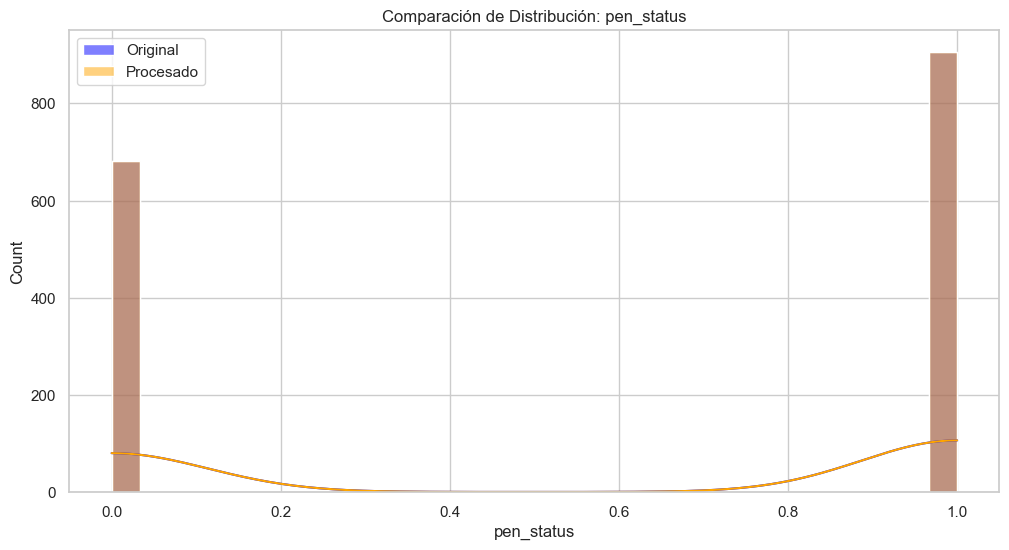

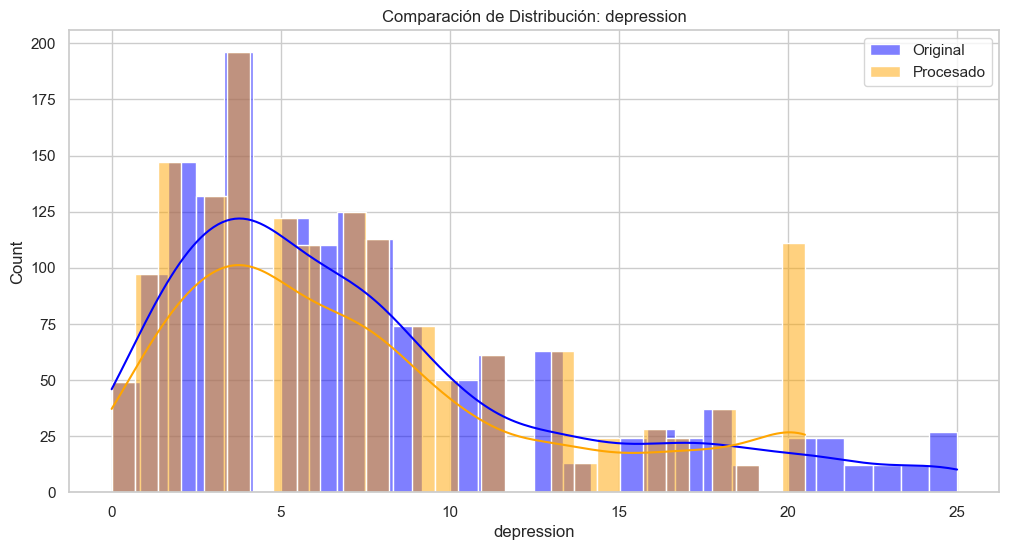

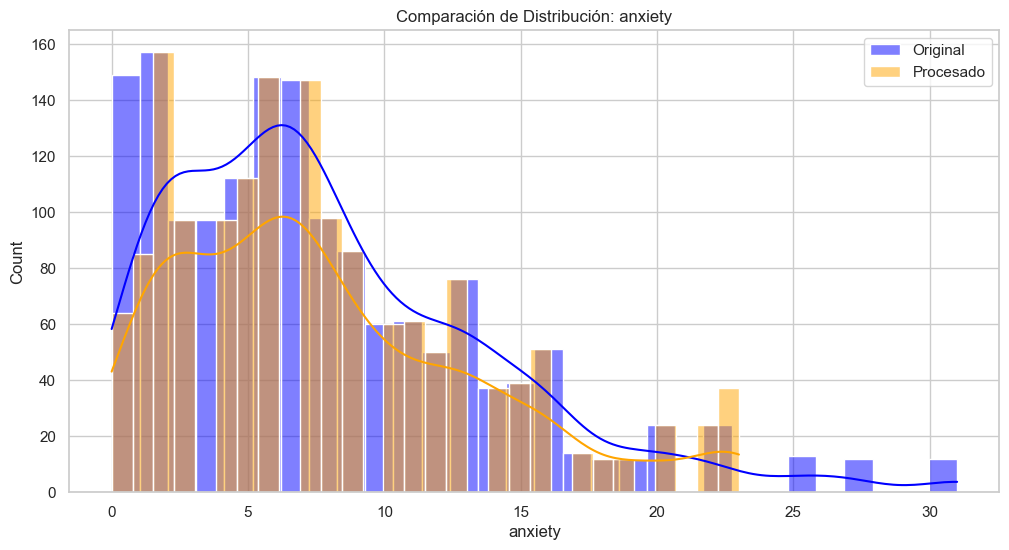

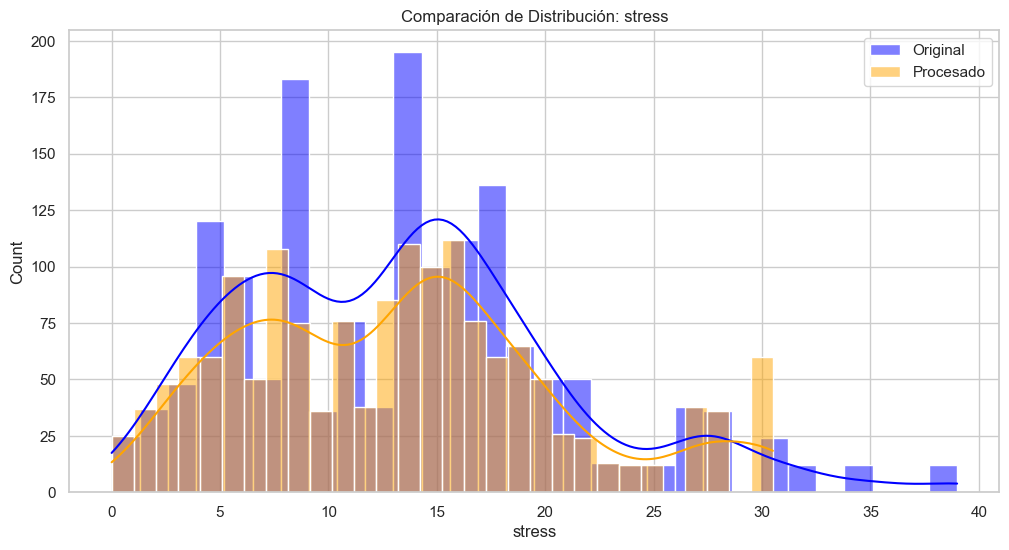

In [23]:
# Graficar distribución antes y después del preprocesamiento
for col in numeric_cols:
    plt.figure(figsize=(12, 6))
    sns.histplot(df[col], kde=True, color='blue', label='Original', bins=30)
    sns.histplot(df_processed[col], kde=True, color='orange', label='Procesado', bins=30)
    plt.title(f"Comparación de Distribución: {col}")
    plt.legend()
    plt.show()

Ahora comparando ambos datos podemos ver los cambios dentro de los sesgos, los originales por lo general están sesgados a la izquierda, mientras que con los nuevos cambios se estandarizan más los valores, y prácticamente eliminado los valores atípicos.

### **Aplicación de transformación wavelet (WDT)**


In [ ]:
def extract_wavelet_features(data_list, wavelet='db4', level=1):
    """
    Aplicar la Transformada Wavelet a una lista de datos y extraer características.

    Parámetros:
    data_list = lista de datos a usar.
    wavelet = transformacion wavelet a usar (Daubechies 4 wavelet)
    level = número de veces que se realiza el proceso de descomposición en una señal o imagen
    """
    coeffs = pywt.wavedec(data_list, wavelet, level=level)
    features = []
    for coef in coeffs:
        features.extend([
            np.mean(coef),
            np.std(coef),
            np.min(coef),
            np.max(coef)
        ])
    return features

**Ejemplo de aplicación wavelet a la columna de series de tiempo X**

Para este ejemplo estaremos haciendo uso de los datos que se acaban de procesar.

In [ ]:
# Inicializar listas para la matriz de características
DWT_features = []

# Iterar a una fila en el conjunto de datos
for _, row in df_processed.iterrows():
    row_features = []

    # Procesar la columna relevante, en este caso la columna X
    for col in ['x']:
        row_features.extend(extract_wavelet_features(row[col]))

    # Agregar las características a la lista
    DWT_features.append(row_features)

# Convertir lista a un arreglo
DWT_array = np.array(DWT_features)

# Arreglo de caracterizticas
print("caracterizticas procesadas:", DWT_array.shape)

/usr/local/lib/python3.11/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 1 is too high: all coefficients will experience boundary effects.
  warnings.warn(


caracterizticas procesadas: (1588, 8)


**Ejemplo de aplicación wavelet a todas las columnas de la serie de tiempo**

In [ ]:
# Inicializar listas para la matriz de características
DWT_features = []

# Iterar a una fila en el conjunto de datos
for _, row in df_processed.iterrows():
    row_features = []

    # Procesar la columna relevante, en este caso la columna X
    for col in ['x', 'y', 'timestamp', 'altitude', 'pressure', 'azimuth']:
        row_features.extend(extract_wavelet_features(row[col]))

    # Agregar las características a la lista
    DWT_features.append(row_features)

# Convertir lista a un arreglo
DWT_array = np.array(DWT_features)

# Arreglo de caracterizticas
print("caracterizticas procesadas:", DWT_array.shape)

caracterizticas procesadas: (1588, 48)


**Preguntas a contestar despues de abordar el EDA**

**¿Hay valores faltantes en el conjunto de datos? ¿Se pueden identificar patrones de ausencia?**

R: El set de datos no tiene ningún conjunto de datos faltantes

**¿Cuáles son las estadísticas resumidas del conjunto de datos?**
**¿Hay valores atípicos en el conjunto de datos?**

R: Sabemos que existen un máximo de 7 tareas existentes en la columna de **tareas**, el estatus de la pluma son valores de 0 y 1, donde existen ligeramente mas valores en 1, X y Y son nuestras coordenadas de x y y de la escritura sobre tiempo, **Azimut** es el ángulo, generalmente medido en grados, entre la dirección de un objeto (o señal) y una dirección de referencia, la **altitud** se refiere al ángulo entre el lápiz y la superficie de la tableta, La **presión** es la presión obtenida en la escritura y nuestras etiquetas serían los valores designados a las emociones como **depresión, ansiedad y estrés**

Las únicos datos que actualmente parecen tener datos sesgados, serian las etiquetas ya que los resultados varían bastante dependiendo de la ejecución de los usuarios, a diferencia de los datos obtenidos a través del tiempo, esto es algo observable en las tablas obtenidas dentro del documento.

**¿Cuál es la cardinalidad de las variables categóricas?**

*   Cardinalidad:
*   Tareas: 8
*   Estatus de pluma: 2
*   Depresión: 25
*   Ansiedad: 25
*   Estrés: 33

**¿Existen distribuciones sesgadas en el conjunto de datos?**

R: Las únicos datos que actualmente parecen tener datos sesgados, serian las etiquetas.

**¿Se identifican tendencias temporales? (En caso de que el conjunto incluya una dimensión de tiempo).**

R; Por la naturaleza de los datos, En general siguen un mismo patrón en especial al realizar las misma tareas pero varían dependiendo de la información de cada usuario o paciente, en ese aspecto podriamos argumentar  que los datos se pueden considerar como un poco ruidosas, en otras palabras, variaciones aleatorias o impredecibles en los datos que no siguen ningún patrón claro.

**¿Cómo se distribuyen los datos en función de diferentes categorías? (análisis bivariado)**

R: Por lo general las etiquetas tienen una correlacion, el resto de los datos, tienen su propia distrubicion, por ejemplo el estatus de la pluma solo tiene una distrbucion binaria (0 y 1).

**¿Se deberían normalizar las imágenes para visualizarlas mejor?**

R: El set de datos no requiere normalizacion de imagenes, ya que usa pricnipalmente series de tiempo

**¿Hay desequilibrio en las clases de la variable objetivo?**

R: Existe un ligero desbalance en las etiquetas ya que los pacientes tienen datos de mayor cantidad o existe paciente que sufre estres mas que ansiedad y depresion.


## Conclusiones

Después de realizar el EDA, nos pudimos familiarizar mas con los datos que estaremos trabajando y las tendencias que existen dentro de nuestros datos, de manera general consideramos que los puntos mas importantes a considerar son los siguientes:

*   **homework:** Podemos observar que hay un mínimo de 0 tareas y 7 como máximo.
*   **pen_status:** El valor medio es 0,57, lo que sugiere que la mayoría de las muestras se encuentran con el valor de 1.
*   El valor máximo de **depression, anxiety y stress:** es 25, 15 y 39, respectivamente.

*   El valor mas alto siendo 39 de **stress**

*   Existen datos atípicos principalmente en las etiquetas de nuestros datos, de los cuales las etiquetas tienen correlación consigo mismas.

*   En las series de tiempo, especialmente cuando hablamos de coordenadas X y Y, tiene la misma tendencia cuando se comparan las mismas tareas en diferentes pacientes. Esto tiene sentido ya que están realizando una tarea similar pero no es lo mismo.


## Referencias

Faundez-Zanuy, M. (2025). Comprehensive analysis of least significant bit and difference expansion watermarking algorithms for online signature signals. Expert Systems with Applications, 267, 126214. [https://doi.org/10.1016/j.eswa.2024.126214](https://doi.org/10.1016/j.eswa.2024.126214)

Likforman-Sulem, L., Esposito, A., Faundez-Zanuy, M., Clemençon, S., & Cordasco, G. (2017). EMOTHAW: A novel database for emotional state recognition from handwriting and drawing. IEEE Transactions on Human-Machine Systems, 47(2), 273–284. [https://doi.org/10.1109/THMS.2016.2635441](https://doi.org/10.1109/THMS.2016.2635441)


Nolazco-Flores, J. A., Faundez-Zanuy, M., Velázquez-Flores, O. A., Cordasco, G., & Esposito, A. (2021). Emotional state recognition performance improvement on a handwriting and drawing task. IEEE Access, 9, 28496–28504. [https://doi.org/10.1109/ACCESS.2021.3058443](https://doi.org/10.1109/ACCESS.2021.3058443)

San Roman, R., Fernandez, P., Défossez, A., Furon, T., Tran, T., & Elsahar, H. (2024). Proactive detection of voice cloning with localized watermarking. arXiv. [https://arxiv.org/abs/2401.17264](https://arxiv.org/abs/2401.17264)